# loc2tile
This noteboook illustrates how to get tiles from openstreetmaps or related services

In [31]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import os, sys
import requests
import shutil
import skimage.io

sys.path.append("../src/utils/")
from geo import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# Define zoom level and corners of the area we want to create tiles for
zoom = 12
lat_deg = [23.355254, 23.145801] 
lon_deg = [77.284349, 77.544244]
_, _x, _y = np.array([deg2num(zoom, lat, lon) for lat, lon in zip(lat_deg, lon_deg)]).T

In [33]:
_x.sort()
_y.sort()
startx, endx = _x[0], _x[-1]
starty, endy = _y[0], _y[-1]

In [34]:
x_vals = np.arange(startx, endx+1)
y_vals = np.arange(starty, endy+1)
x = x_vals[0]
y = y_vals[0]


In [35]:
for x, y in zip(x_vals, y_vals):
    r = requests.post(f"https://a.tile.opentopomap.org/{zoom}/{x}/{y}.png", stream=True)
    path = f"../data/tiles/opentopomap_{zoom}_{x}_{y}.png"
    if r.status_code == 200:
        with open(path, 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f) 
    del r

#### Quick test

In [36]:
zoom, xref, yref = 14, 11711, 7117
for i in [-1, 0, 1]:
    x = xref + i
    for j in [-1, 0, 1]:
        y = yref + j
        r = requests.post(f"https://a.tile.opentopomap.org/{zoom}/{x}/{y}.png", stream=True)
        path = f"../data/tiles/opentopomap_{zoom}_{x}_{y}.png"
        if r.status_code == 200:
            print(path)
            with open(path, 'wb') as f:
                r.raw.decode_content = True
                shutil.copyfileobj(r.raw, f) 
        del r

../data/tiles/opentopomap_14_11710_7116.png
../data/tiles/opentopomap_14_11710_7117.png
../data/tiles/opentopomap_14_11710_7118.png
../data/tiles/opentopomap_14_11711_7116.png
../data/tiles/opentopomap_14_11711_7117.png
../data/tiles/opentopomap_14_11711_7118.png
../data/tiles/opentopomap_14_11712_7116.png
../data/tiles/opentopomap_14_11712_7117.png
../data/tiles/opentopomap_14_11712_7118.png


In [29]:
tile00 = skimage.io.imread("../data/tiles/opentopomap_14_11710_7116.png")
tile01 = skimage.io.imread("../data/tiles/opentopomap_14_11711_7116.png")
tile02 = skimage.io.imread("../data/tiles/opentopomap_14_11712_7116.png")
tile10 = skimage.io.imread("../data/tiles/opentopomap_14_11710_7117.png")
tile11 = skimage.io.imread("../data/tiles/opentopomap_14_11711_7117.png")
tile12 = skimage.io.imread("../data/tiles/opentopomap_14_11712_7117.png")
tile20 = skimage.io.imread("../data/tiles/opentopomap_14_11710_7118.png")
tile21 = skimage.io.imread("../data/tiles/opentopomap_14_11711_7118.png")
tile22 = skimage.io.imread("../data/tiles/opentopomap_14_11712_7118.png")

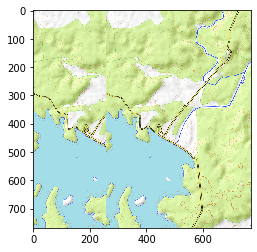

In [30]:
plt.imshow(
np.concatenate(
    (np.concatenate((tile01, tile01, tile02), axis=1),
     np.concatenate((tile11, tile11, tile12), axis=1),
     np.concatenate((tile21, tile21, tile22), axis=1)), axis=0))

(256, 256, 4)


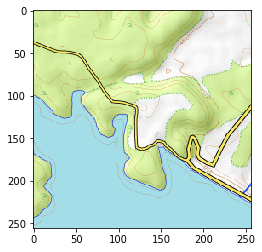

In [41]:
print(tile11.shape)
plt.imshow(tile11)